# **_Business Understanding_**


### ** The Data Set **

The Data Set used is "default of credit card clients" from UCI, provided by I-Cheng Yeh with Chung Hua University and Tamkang University in Taiwan.  The purpose of the data set is to accurately predict the probablity of default for credit card customers in Taiwan.

### ** The Purpose of the Data Set **

The reason the creators of the data wanted to predict default rates was not given.  Business applications of predicting an overall default rate could include capcacity planning and financial reporting.  However, the ability to predict the likelihood that a given customer will default can also be an important aspect of managing the profitability of a credit card business.  Projecting the likelihood of default for a given customer can be used to:

    1. Determine the collection strategy if a customer misses a payment, and 
    2. Determine the appropriate credit limit for that customer.

It should be noted that an inaccurate projection in either direction when used to determine how a customer will be treated can adversely impact profitability.  If the risk is overestimated, collection efforts may be too intense thereby alienating customers and unnecessarily constraining credit lines.  Restricing credit lines too much may inhibit customers' ability and willingness to use the product.  If the risk is underestimated, the bank will incur higher losses than it might otherwise.  We expect that a more acceptable bias would be to overestimate the likelihood of default rather than underestimate it.

### ** Measuring the Succsess of an Algorithm **

We will set aside a portion of the data for validation (the test set), and use Logistic Regression on the remaining training set.

The effectiveness of the model in predicting an overall default rate will be measured by its performance when applied to the hold-out set.  If the actual results are within 10% of the estimate, we will deem it to be successful.  We will also use the AUC against the test set.  Judgmentally, we will consider an AUC of 80% or more acceptable.

To test the effectiveness of the model for use in determining the course of action with respect to a specific customer we will look for specificity and sensitivity rates at certain probabilities of default.  In order to determine whether a "lighter" collection strategy should be used, we will look for those probabilities where the sensitivity (true positive rate) is greater than 90%. In order to determine that a request to increase credit will be declined, we will look for those probabilities where the specificity is 90% or more. 



(Not mentioning LDA/PCA specifically because we will use those transformed variables withinn context of logistic regression.)




# Paul's Random Notes we might want to be aware of or mention:

    1. Do we think Attribute 'PAY_0' is really 'PAY_1'?
    2. We don't know the definition of "Default"
    3. We are missing certain infromation that we believe would be important in predicting default
        (based on industry knowledge)
        - Age of Account
        - Total Number of Payments Made
        - Indication of whether or not customer is paying their Other obligations.
    
    
### Variables we might want to Create to Look At:
    1. Line Utilization (Billed Amount/Limit)
    2. Growth in Billed Amount:  Most Recent/Average, 
                                 Whether or not most recent is the largest, or 
                                growth from ave of first three months.
    3.Number of Months Delinquent (1-8 and any)
    4. Is first Delinquency in the last month or two?
    5. % of Billed Amount Paid.
    



# **_Exploring Joint Attributes_**

### Autocorrelation

Three of the variables in our data set are Time Series. (Amount Billed, Payment Amount, and "Payment Status").  We explored the potential for Autocorrelation within these series by reviewing scatterplots and correlation matrices.  These indicate that autocorrelation is likely to be an issue for billed amounts, and perhaps Payment Status.  We are aware that using correlation on categorical variables in generally nonsensical, but in this case, we feel that it is at least worth looking at.  [I WILL EXPLORE THIS IN TABLEAU]  While we should still test for autocorrelation in the Payment Amount variable in the modelling phase, we are less concerned about this based on correlation matrix.

### Structural Relationships
                                                         
There are two structural relationships between attributes:
    1. The Amount of the Payment is likely related to the Amount Billed. While the correlation between payments and billed amounts is 30%, We should explore transformations for this.  The payment as % of billed amount as a continuous variable, or as a categorical variable may add predictive value. 
    2. The Amount Billed is limited by the Credit Limit. The correlations between the credit limit and balances range between 28% and 30%.  While these are not excessive, the limiting pattern is visible in scatter plots, and the logical connection between the variables could warrant transformation.  One candidate is the billed amount as a % of the credit limit.
    
    
### Relationships Between Attributes

I made a lot of progress on this section, but am not ready to distill into a write-up.

### What I've done:

Box plots of Billed Amounts (1-6) against education level:  Some increasing trend at the higher education levels, in the more recent months.  Far less so in the older months.

Box plots of Billed Amounts (1-6) against 10 year age buckets:  Not much here.  Only the 70+ bucket which is probably very small shows higher balances.  Older groups who default seem to have lower balaces than those who don't.

Box plots of Billed Amounts (1-6) against Marital Status:  Nothing interesting here for the two groups of any size.

Box plots of Billed Amounts (1-6) against Gender:  Nothing interesting here.

Built the code for cross-tabs (count, mean, median, 25 pct, and 75 pct) allowing slicing.


### Will consider next:

    1. Box plots for payment amounts
    2. Calculate average Payment and billed amounts, and do the cross-tabs against that.
    3. Look at Payment Status in Tableau/

In [1]:
# Improting Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


# Readung in the data file
df = pd.read_csv('Data/CreditCardDefaults.csv')

df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

      ...       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0     ...               0         0       689         0         0         0   
1     ...            3261         0      1000      1000      1000         0   
2     ...           15549      1518      1500      1000      1000      1000   
3     ...           29547      2000      2019      1200      1100      1069   
4     ...           19131      2000     36681     10000      9000       689   

   PAY_AMT6  default  Unnamed: 25  Unnamed: 26  
0         0        1          NaN       6636.0  
1      2000        1          NaN          NaN  
2      5000        0          NaN          NaN  
3      1000        0          NaN          NaN  
4       679        0          NaN          NaN  

[5 rows x 27 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
ID             30000 non-null int64
LIMIT_BAL      30000 non-null int64
SEX            30000 non-null int64
EDUCATION      30000 non-null int64
MARRIAGE       30000 non-null int64
AGE            30000 non-null int64
PAY_0          30000 non-null int64
PAY_2          30000 non-null int64
PAY_3          30000 non-null int64
PAY_4          30000 non-null int64
PAY_5          30000 non-null int64
PAY_6          30000 non-null int64
BILL_AMT1      30000 non-null int64
BILL_AMT2      30000 non-null int64
BILL_AMT3      30000 non-null int64
BILL_AMT4      30000 non-null int64
BILL_AMT5      30000 non-null int64
BILL_AMT6      30000 non-null int64
PAY_AMT1       30000 non-null int64
PAY_AMT2       30000 non-null int64
PAY_AMT3       30000 non-null int64
PAY_AMT4       30000 non-null int64
PAY_AMT5       30000 non-null int64
PAY_AMT6       30000 non-null int64
default        30000 non-nu

In [3]:
# Creating Lists of Attributes 
BillsAndPayments=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default']
Bills=['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','default']
Payments=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default']
PayStatus=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default']

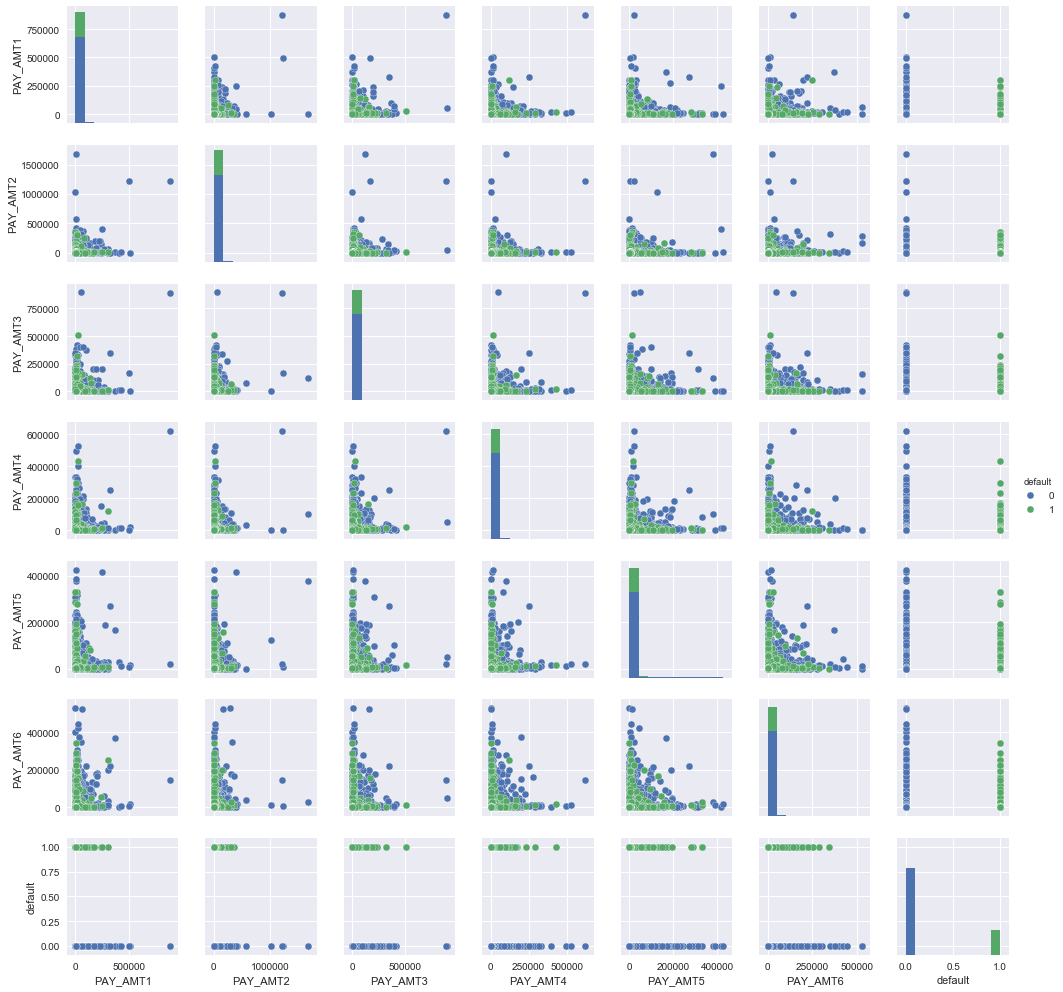

In [4]:
%matplotlib inline
sns.set()
sns.pairplot(df[Payments],hue = 'default',size = 2)

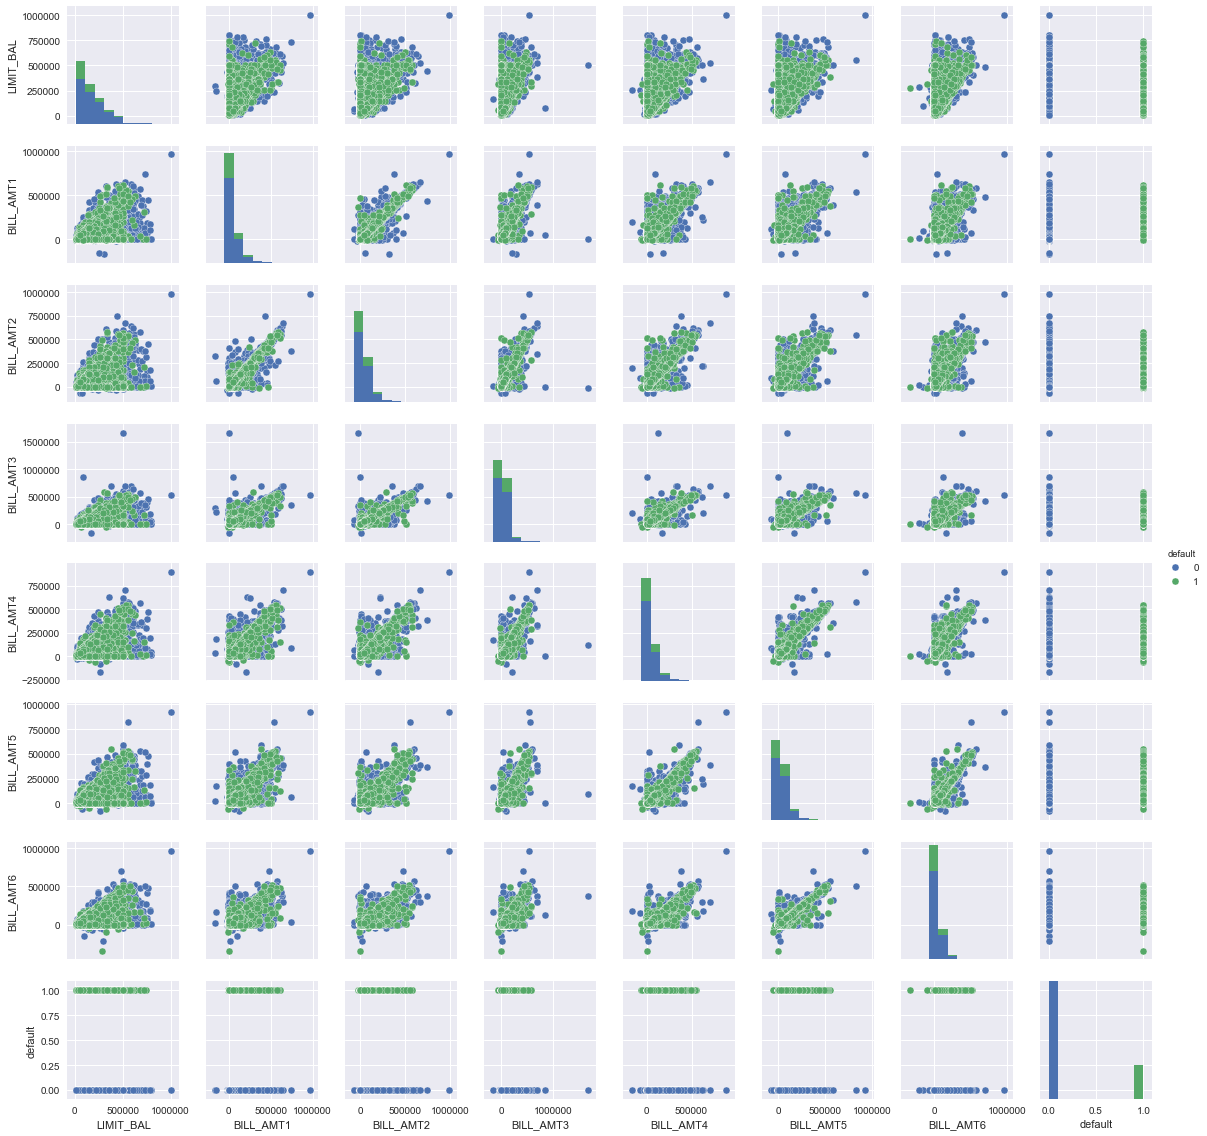

In [5]:
%matplotlib inline
sns.set()
sns.pairplot(df[Bills],hue = 'default',size = 2)

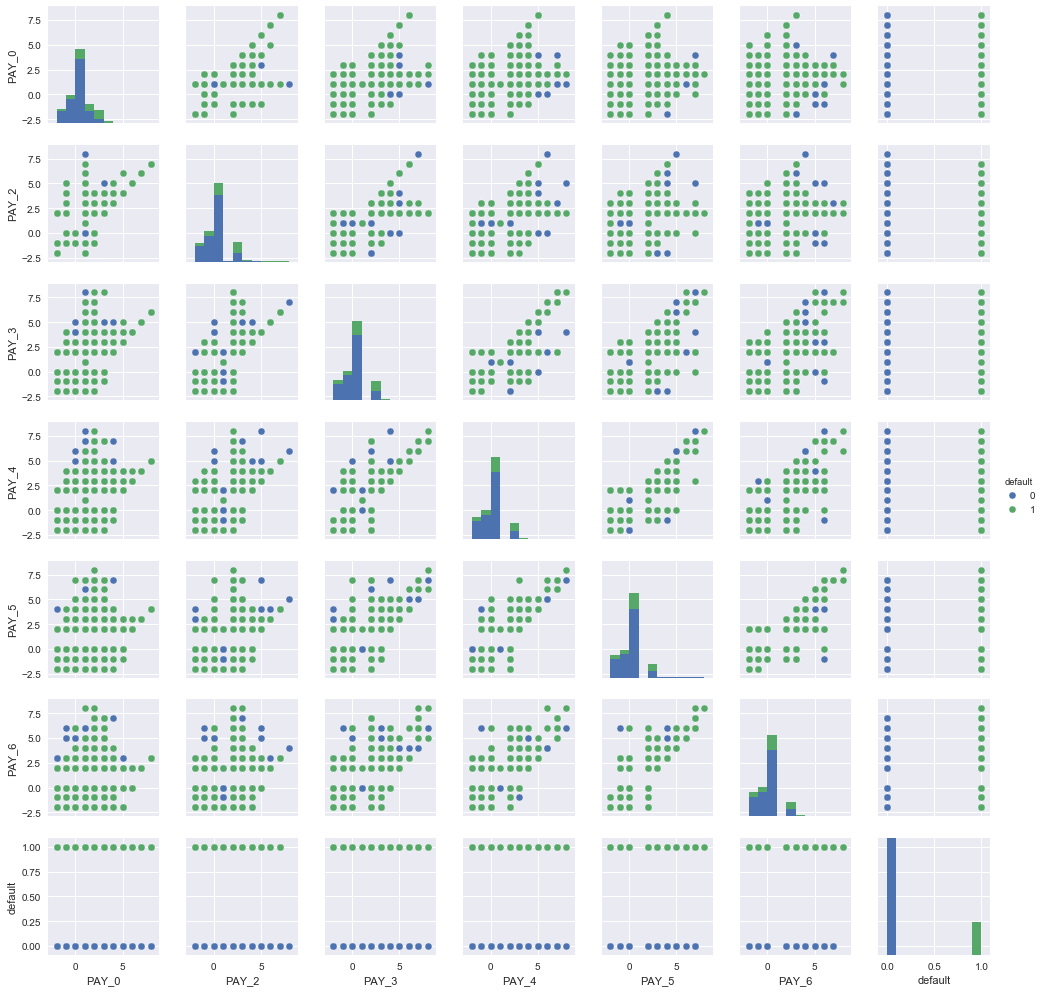

In [6]:
%matplotlib inline
sns.set()
sns.pairplot(df[PayStatus],hue = 'default',size = 2)

In [7]:
# Tried Running this seaborn grid, but was just taking too long.

#sns.set(style="white")
#g = sns.PairGrid(df[Payments], hue = 'default', diag_sharey=False)
#g.map_lower(sns.kdeplot,cmap="Blues_d")
#g.map_upper(plt.scatter)
#g.map_diag(sns.kdeplot, lw=3)

In [8]:
df[Payments].corr()

PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6   default
PAY_AMT1  1.000000  0.285576  0.252191  0.199558  0.148459  0.185735 -0.072929
PAY_AMT2  0.285576  1.000000  0.244770  0.180107  0.180908  0.157634 -0.058579
PAY_AMT3  0.252191  0.244770  1.000000  0.216325  0.159214  0.162740 -0.056250
PAY_AMT4  0.199558  0.180107  0.216325  1.000000  0.151830  0.157834 -0.056827
PAY_AMT5  0.148459  0.180908  0.159214  0.151830  1.000000  0.154896 -0.055124
PAY_AMT6  0.185735  0.157634  0.162740  0.157834  0.154896  1.000000 -0.053183
default  -0.072929 -0.058579 -0.056250 -0.056827 -0.055124 -0.053183  1.000000

In [9]:
df[Bills].corr()

LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
LIMIT_BAL   1.000000   0.285430   0.278314   0.283236   0.293988   0.295562   
BILL_AMT1   0.285430   1.000000   0.951484   0.892279   0.860272   0.829779   
BILL_AMT2   0.278314   0.951484   1.000000   0.928326   0.892482   0.859778   
BILL_AMT3   0.283236   0.892279   0.928326   1.000000   0.923969   0.883910   
BILL_AMT4   0.293988   0.860272   0.892482   0.923969   1.000000   0.940134   
BILL_AMT5   0.295562   0.829779   0.859778   0.883910   0.940134   1.000000   
BILL_AMT6   0.290389   0.802650   0.831594   0.853320   0.900941   0.946197   
default    -0.153520  -0.019644  -0.014193  -0.014076  -0.010156  -0.006760   

           BILL_AMT6   default  
LIMIT_BAL   0.290389 -0.153520  
BILL_AMT1   0.802650 -0.019644  
BILL_AMT2   0.831594 -0.014193  
BILL_AMT3   0.853320 -0.014076  
BILL_AMT4   0.900941 -0.010156  
BILL_AMT5   0.946197 -0.006760  
BILL_AMT6   1.000000 -0.005372  
default    -0.005372  1.000000

In [10]:
df[PayStatus].corr()

PAY_0     PAY_2     PAY_3     PAY_4     PAY_5     PAY_6   default
PAY_0    1.000000  0.672164  0.574245  0.538841  0.509426  0.474553  0.324794
PAY_2    0.672164  1.000000  0.766552  0.662067  0.622780  0.575501  0.263551
PAY_3    0.574245  0.766552  1.000000  0.777359  0.686775  0.632684  0.235253
PAY_4    0.538841  0.662067  0.777359  1.000000  0.819835  0.716449  0.216614
PAY_5    0.509426  0.622780  0.686775  0.819835  1.000000  0.816900  0.204149
PAY_6    0.474553  0.575501  0.632684  0.716449  0.816900  1.000000  0.186866
default  0.324794  0.263551  0.235253  0.216614  0.204149  0.186866  1.000000

C:\Users\X\Anaconda3\lib\site-packages\seaborn\categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


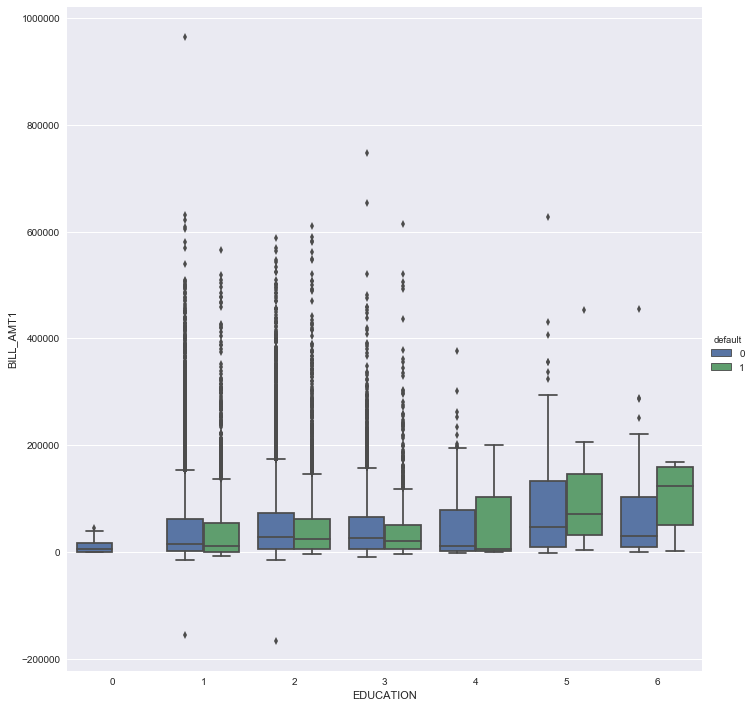

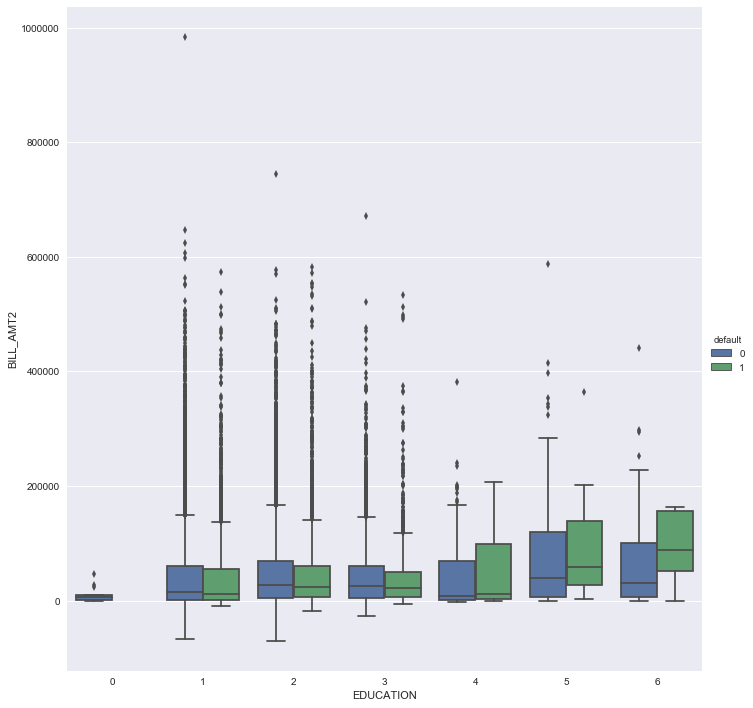

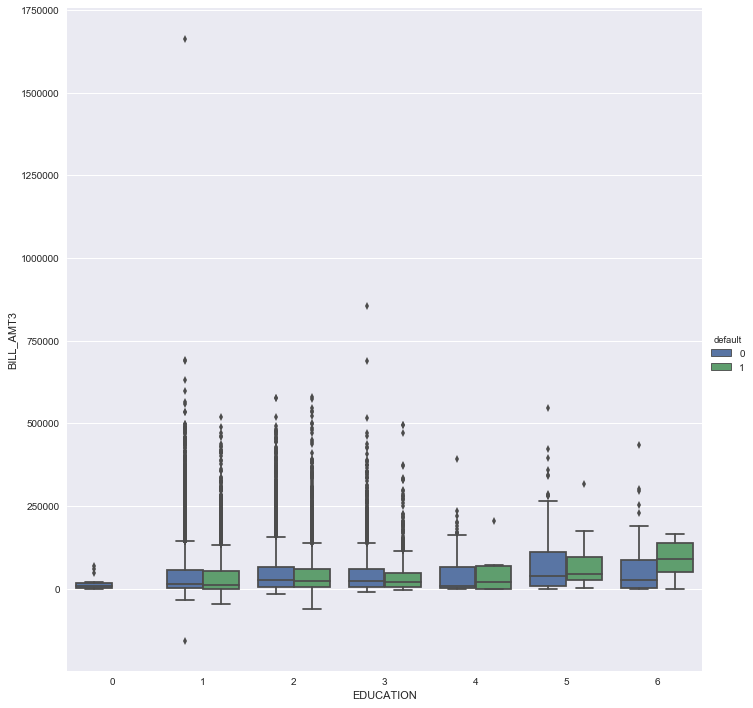

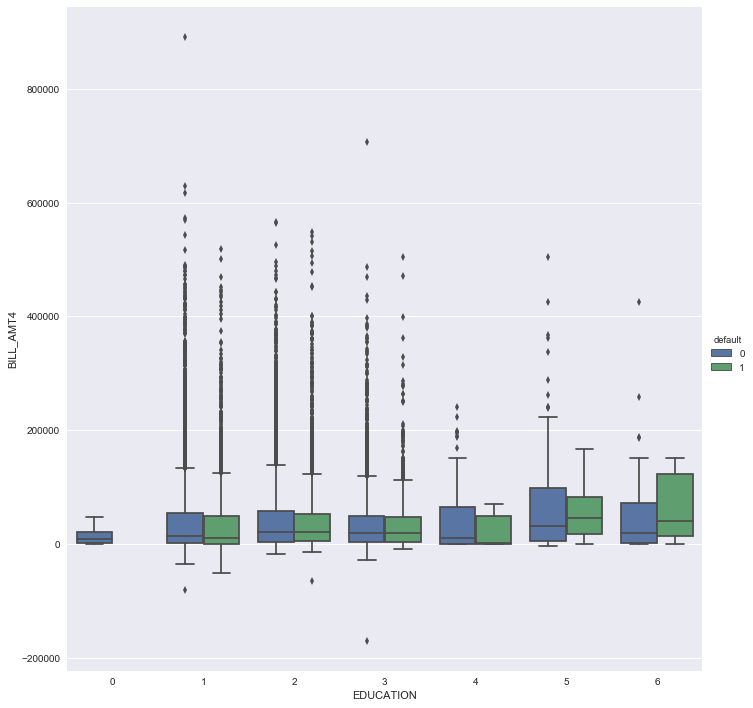

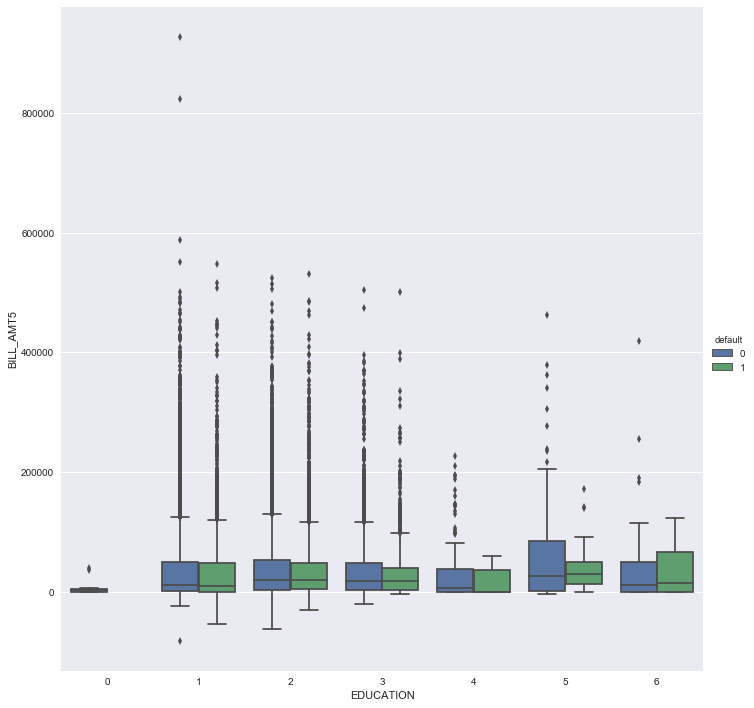

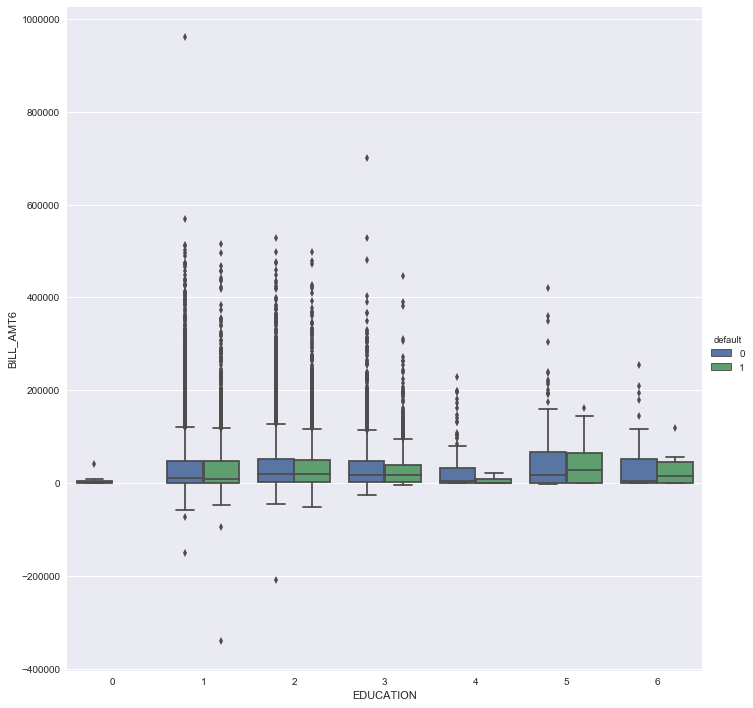

In [11]:
## Bill Boxplots by Education

sns.factorplot('EDUCATION','BILL_AMT1','default',df,kind="box", size = 10)
sns.factorplot('EDUCATION','BILL_AMT2','default',df,kind="box", size = 10)
sns.factorplot('EDUCATION','BILL_AMT3','default',df,kind="box", size = 10)
sns.factorplot('EDUCATION','BILL_AMT4','default',df,kind="box", size = 10)
sns.factorplot('EDUCATION','BILL_AMT5','default',df,kind="box", size = 10)
sns.factorplot('EDUCATION','BILL_AMT6','default',df,kind="box", size = 10)

C:\Users\X\Anaconda3\lib\site-packages\seaborn\categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


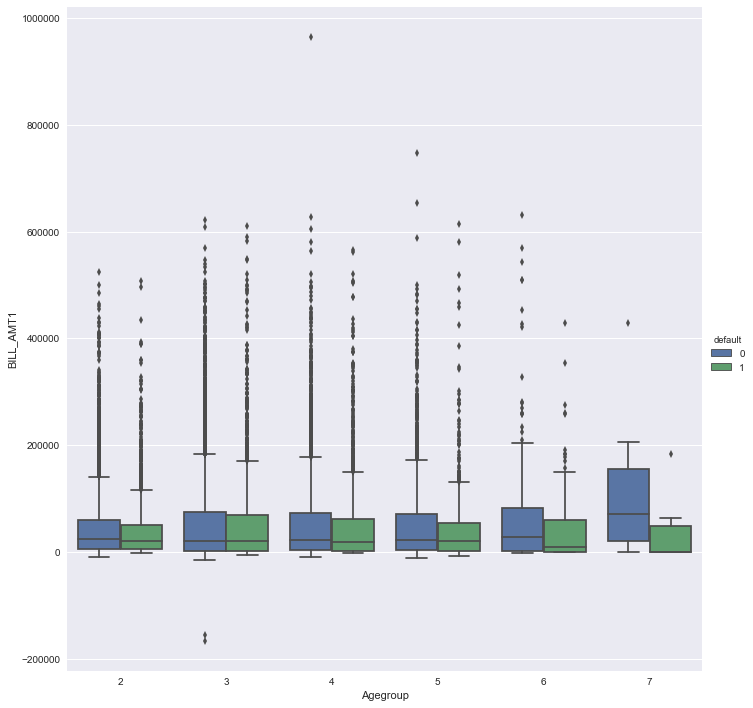

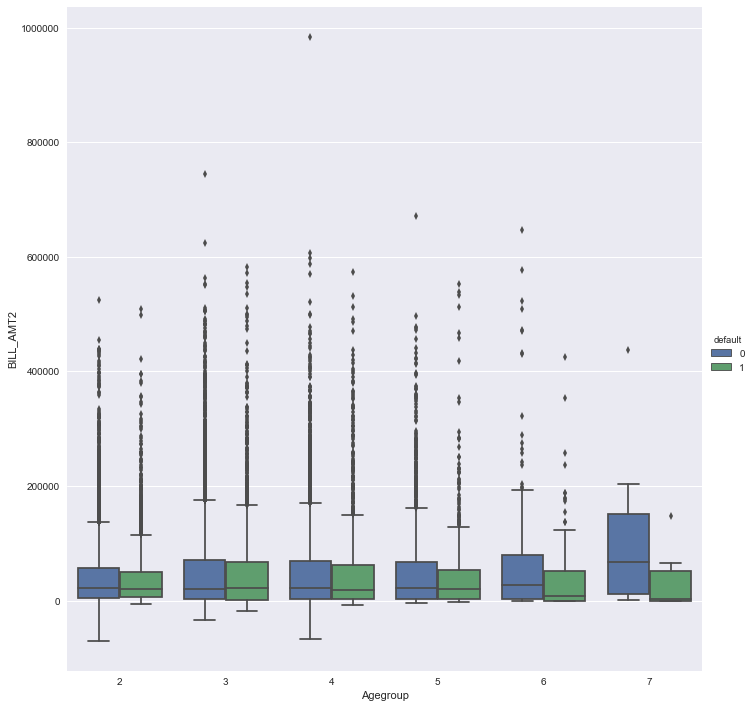

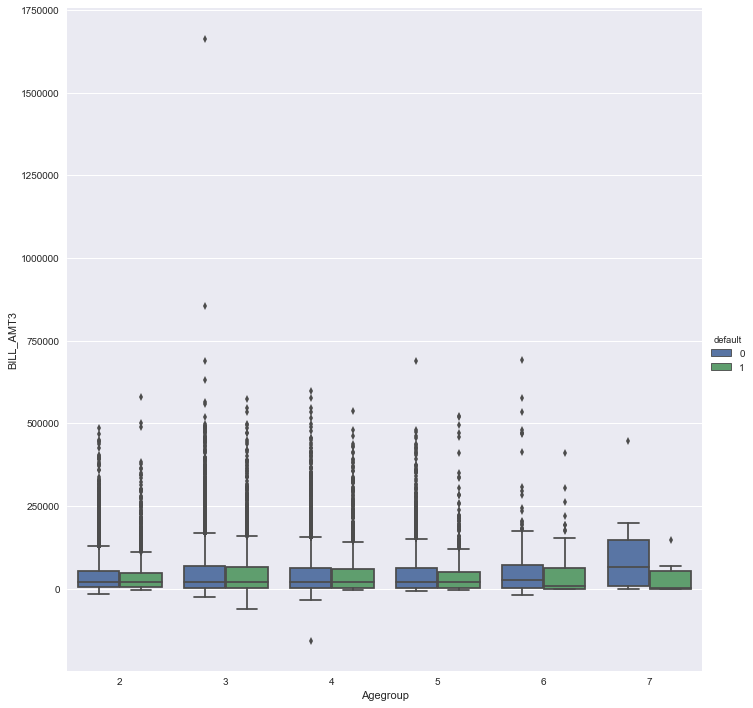

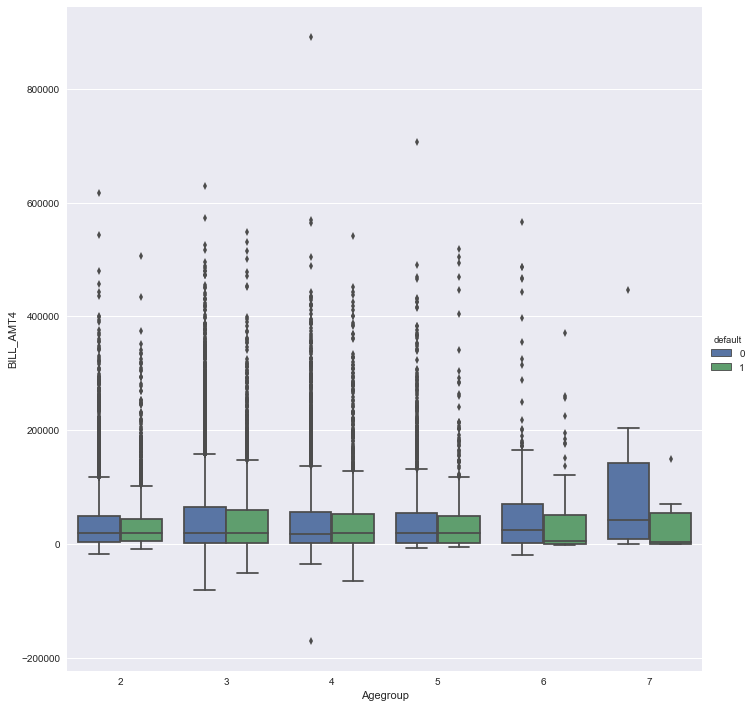

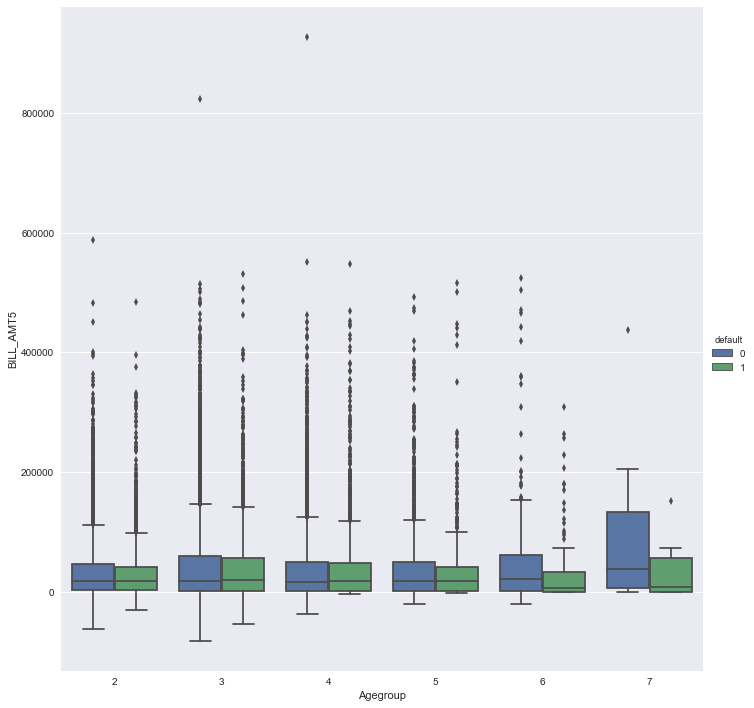

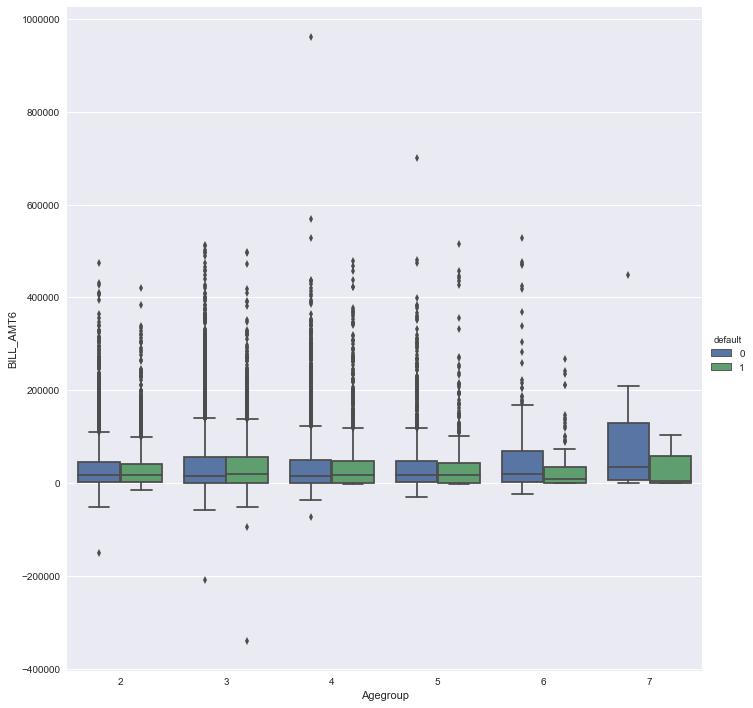

In [12]:
## Bill Boxplots by Age Group

# Creating Age Buckets
df['Agegroup'] = df['AGE']//10

sns.factorplot('Agegroup','BILL_AMT1','default',df,kind="box", size = 10)
sns.factorplot('Agegroup','BILL_AMT2','default',df,kind="box", size = 10)
sns.factorplot('Agegroup','BILL_AMT3','default',df,kind="box", size = 10)
sns.factorplot('Agegroup','BILL_AMT4','default',df,kind="box", size = 10)
sns.factorplot('Agegroup','BILL_AMT5','default',df,kind="box", size = 10)
sns.factorplot('Agegroup','BILL_AMT6','default',df,kind="box", size = 10)

C:\Users\X\Anaconda3\lib\site-packages\seaborn\categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


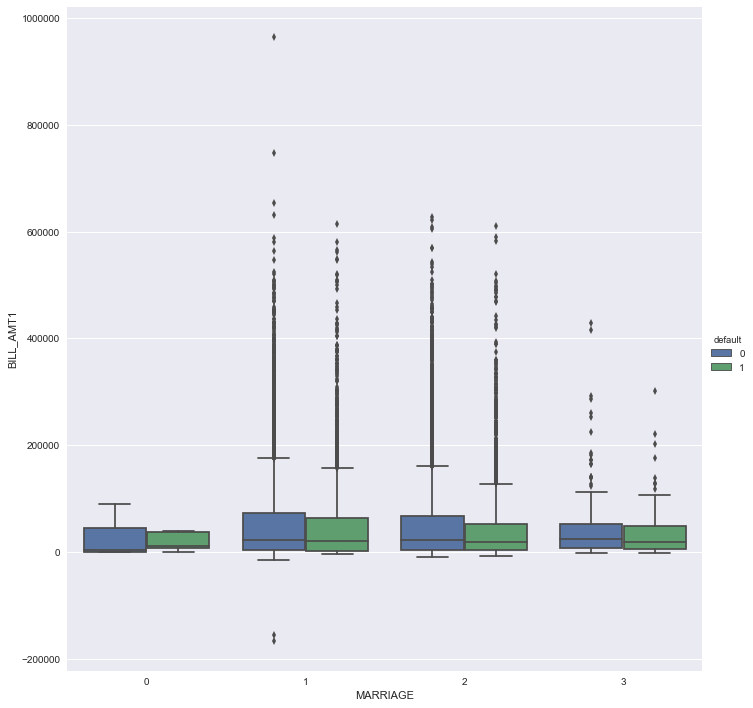

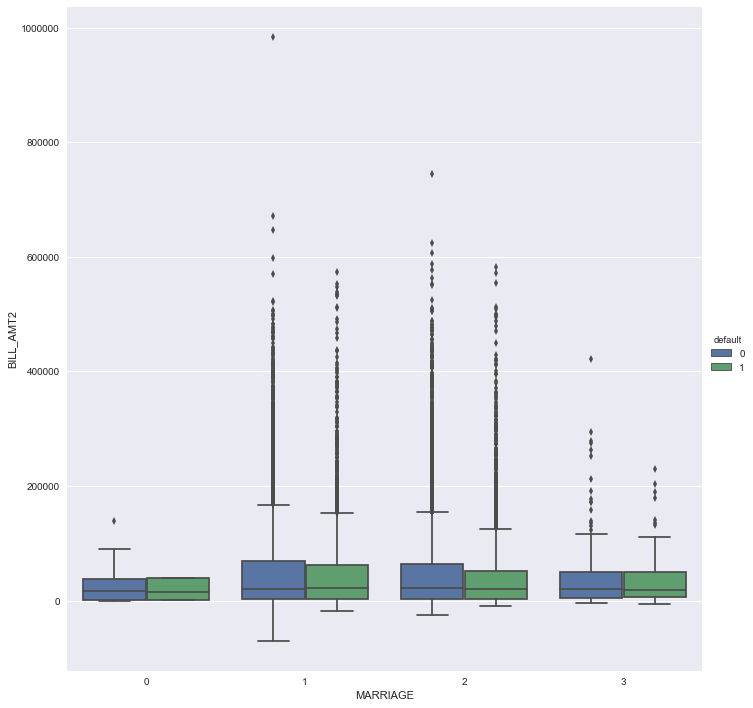

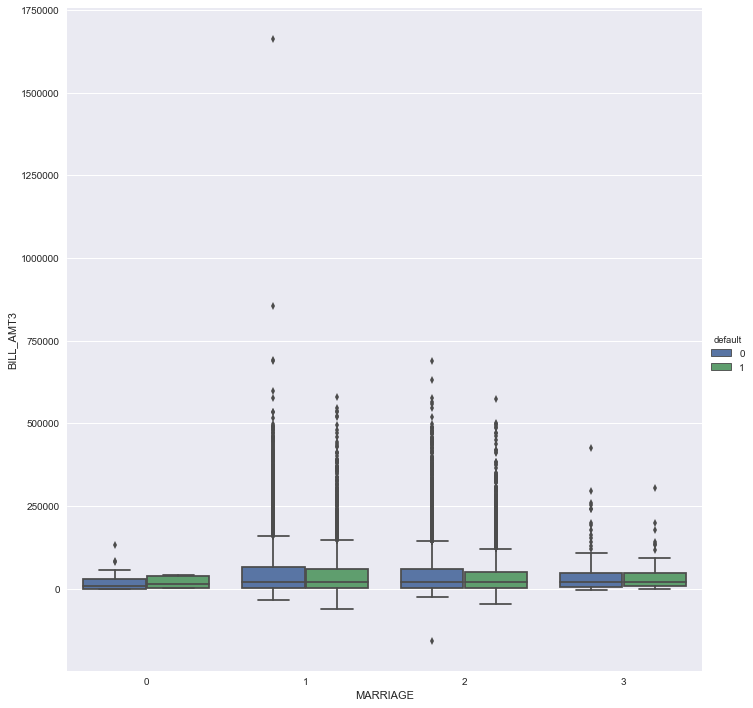

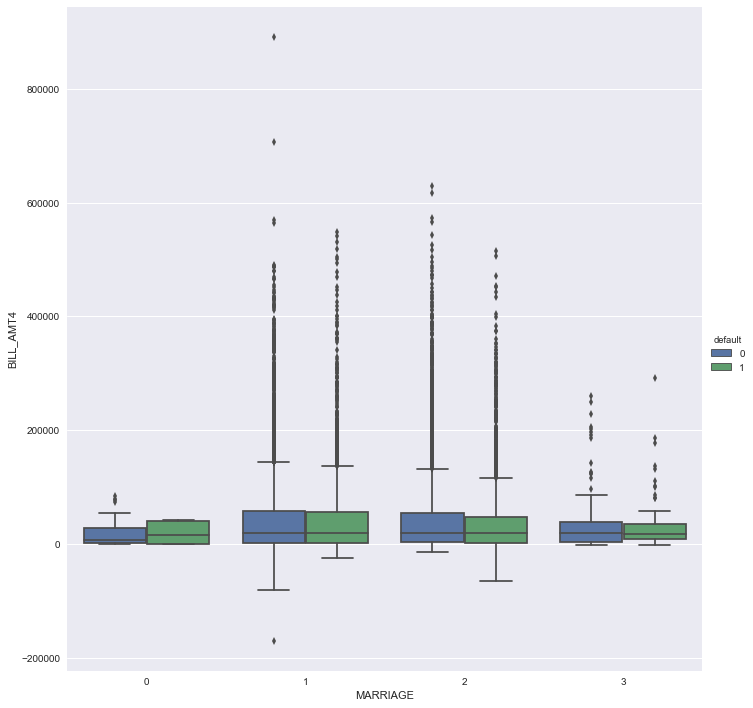

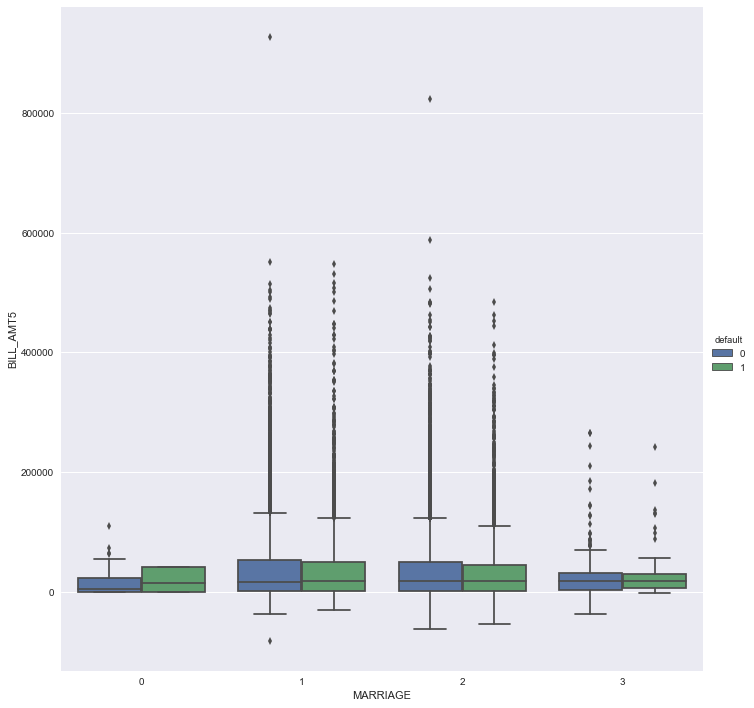

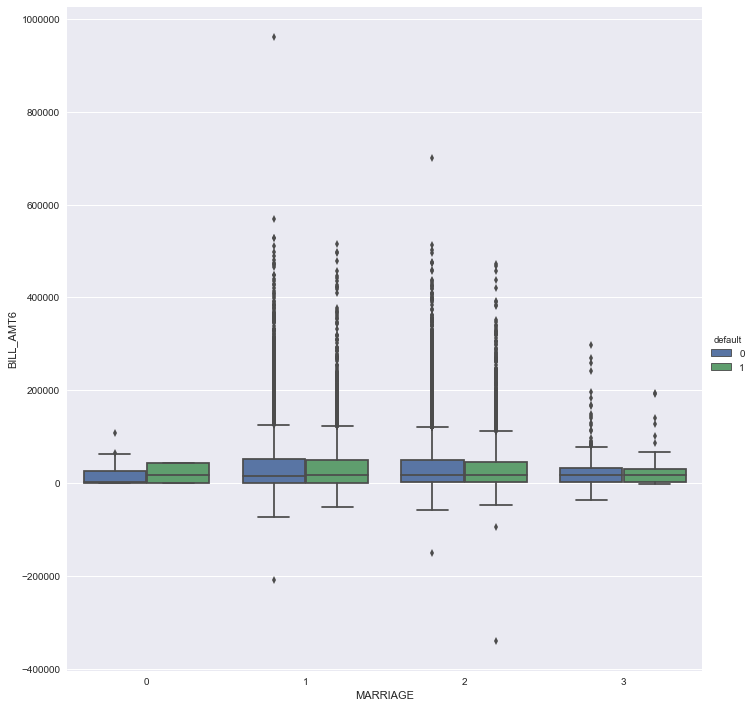

In [13]:
## Bill Boxplots by Marital Status

sns.factorplot('MARRIAGE','BILL_AMT1','default',df,kind="box", size = 10)
sns.factorplot('MARRIAGE','BILL_AMT2','default',df,kind="box", size = 10)
sns.factorplot('MARRIAGE','BILL_AMT3','default',df,kind="box", size = 10)
sns.factorplot('MARRIAGE','BILL_AMT4','default',df,kind="box", size = 10)
sns.factorplot('MARRIAGE','BILL_AMT5','default',df,kind="box", size = 10)
sns.factorplot('MARRIAGE','BILL_AMT6','default',df,kind="box", size = 10)

C:\Users\X\Anaconda3\lib\site-packages\seaborn\categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


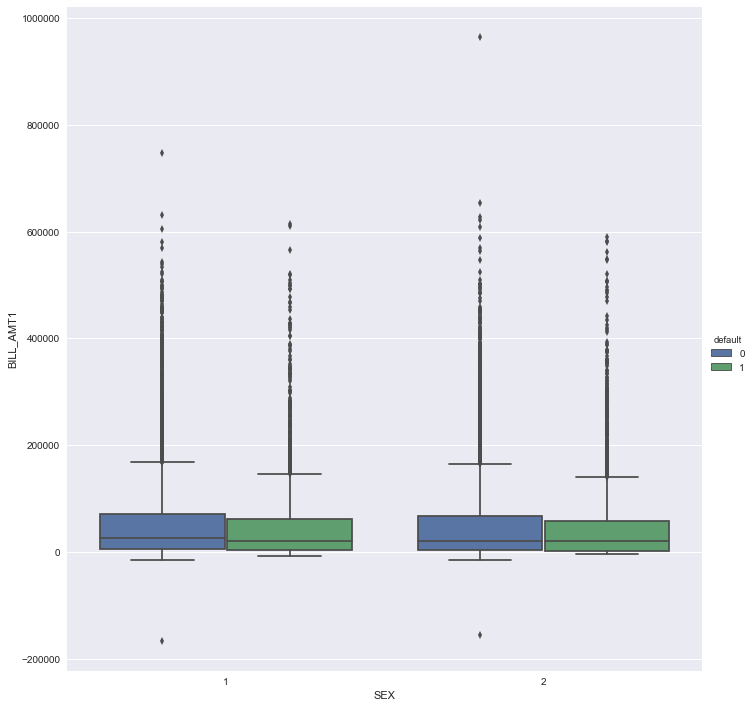

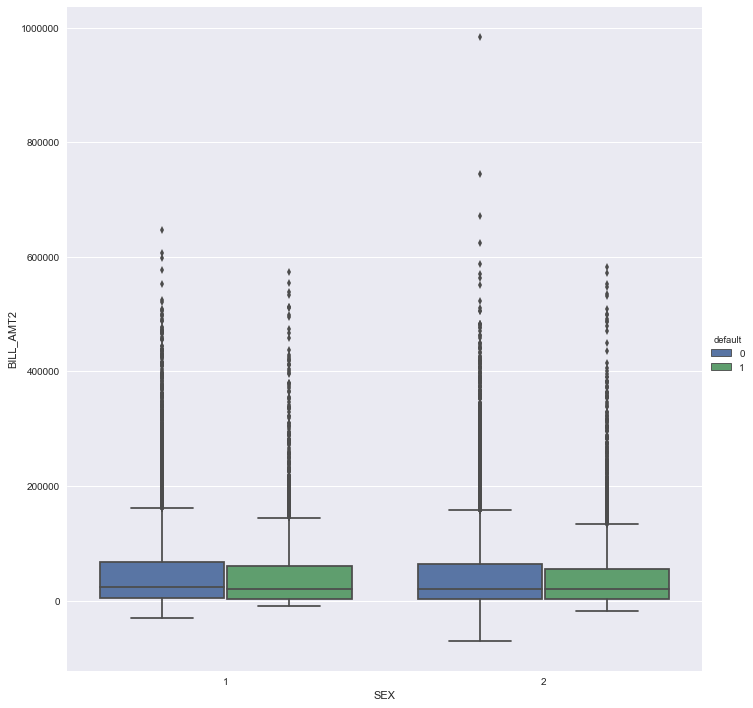

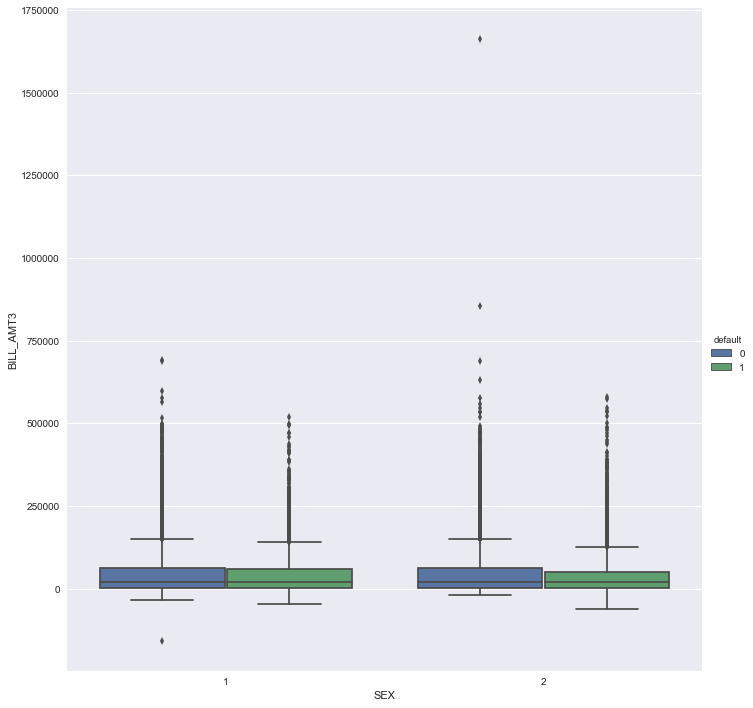

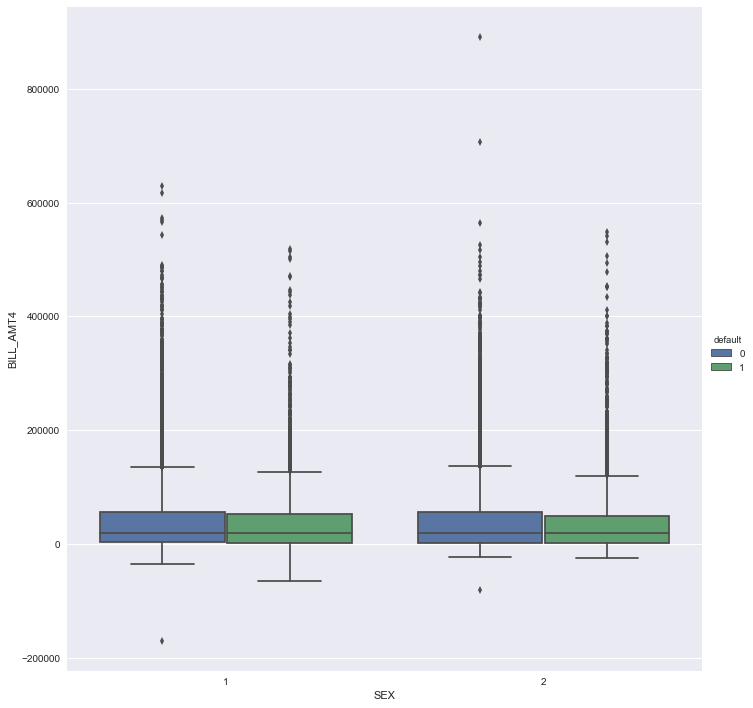

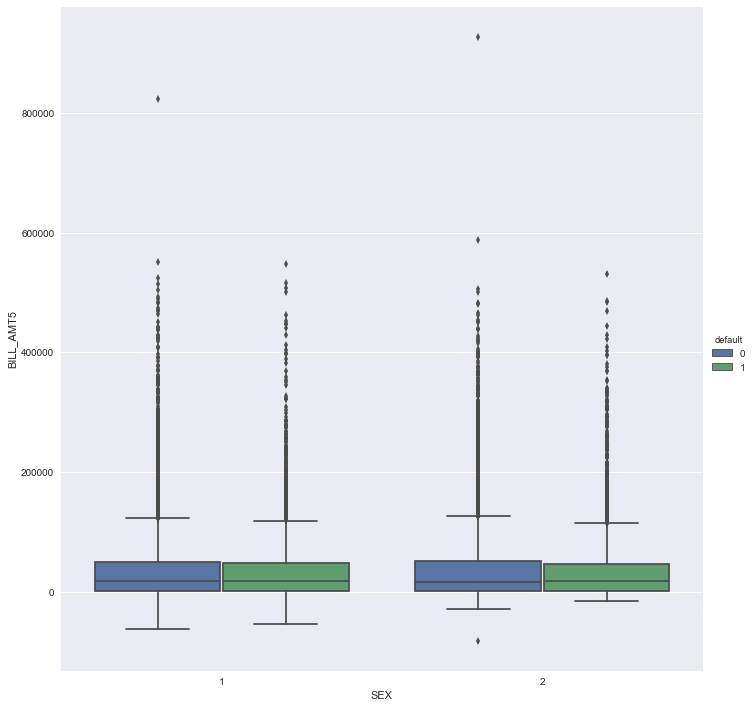

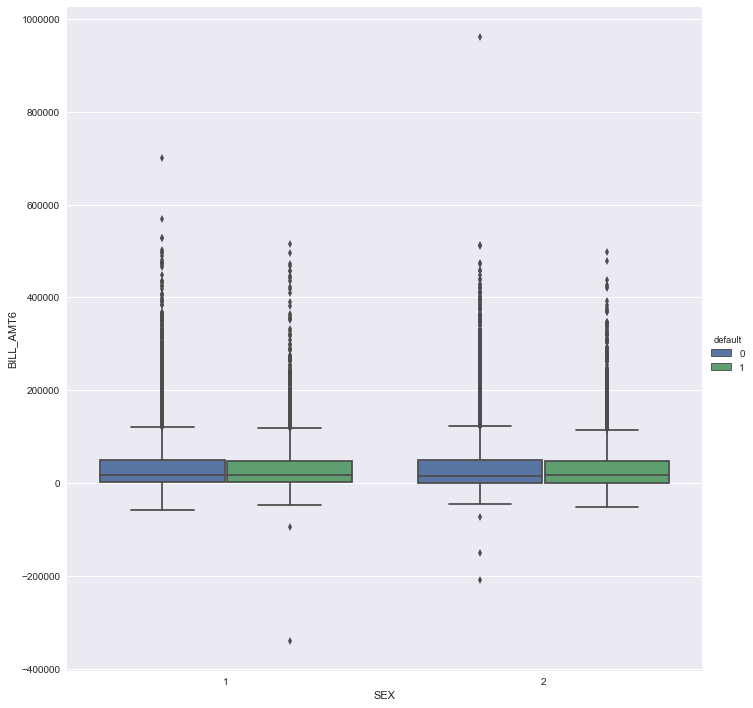

In [14]:
## Bill Boxplots by Gender

sns.factorplot('SEX','BILL_AMT1','default',df,kind="box", size = 10)
sns.factorplot('SEX','BILL_AMT2','default',df,kind="box", size = 10)
sns.factorplot('SEX','BILL_AMT3','default',df,kind="box", size = 10)
sns.factorplot('SEX','BILL_AMT4','default',df,kind="box", size = 10)
sns.factorplot('SEX','BILL_AMT5','default',df,kind="box", size = 10)
sns.factorplot('SEX','BILL_AMT6','default',df,kind="box", size = 10)

In [15]:
#Correlation between Payment amount and the prior month Billed Ammount.
Pay1CorrWithLaggedBill = df['PAY_AMT1'].corr(df['BILL_AMT2'])
Pay2CorrWithLaggedBill = df['PAY_AMT2'].corr(df['BILL_AMT3'])
Pay3CorrWithLaggedBill = df['PAY_AMT3'].corr(df['BILL_AMT4'])
Pay4CorrWithLaggedBill = df['PAY_AMT4'].corr(df['BILL_AMT5'])
Pay5CorrWithLaggedBill = df['PAY_AMT5'].corr(df['BILL_AMT6'])

print(Pay1CorrWithLaggedBill,Pay2CorrWithLaggedBill,Pay3CorrWithLaggedBill,Pay4CorrWithLaggedBill,Pay5CorrWithLaggedBill)

0.28036535701410065 0.31693597717968847 0.3000225291116489 0.29311846318443124 0.30772888950115507


In [16]:
# Cross Tab for categorical variables

def pcntile25(v):
    return np.percentile(v, 25)

def pcntile75(v):
    return np.percentile(v, 75)
    
pd.pivot_table(df,index = ['MARRIAGE'],values = ["PAY_AMT1"], aggfunc=[len, np.mean, pcntile25, np.median, pcntile75])


len         mean pcntile25   median pcntile75
         PAY_AMT1     PAY_AMT1  PAY_AMT1 PAY_AMT1  PAY_AMT1
MARRIAGE                                                   
0              54  7795.111111     434.5   1786.5   3085.75
1           13659  5789.741562     780.0   2157.0   5141.50
2           15964  5523.197194    1000.0   2100.0   5000.00
3             323  6910.461300    1046.0   1900.0   3541.00

In [17]:
pd.pivot_table(df,index = ['SEX'],values = ["PAY_AMT1"], aggfunc=[len, np.mean, pcntile25, np.median, pcntile75])

len         mean pcntile25   median pcntile75
    PAY_AMT1     PAY_AMT1  PAY_AMT1 PAY_AMT1  PAY_AMT1
SEX                                                   
1      11888  5668.537264   1000.00   2100.0      5011
2      18112  5660.327076    877.75   2124.5      5005

In [18]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

     ...     PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0    ...            0       689         0         0         0         0   
1    ...            0      1000      1000      1000         0      2000   
2    ...         1518      1500      1000      1000      1000      5000   
3    ...         2000      2019      1200      1100      1069      1000   
4    ...         2000     36681     10000      9000       689       679   

   default  Unnamed: 25  Unnamed: 26  Agegroup  
0        1          NaN       6636.0         2  
1        1          NaN          NaN         2  
2        0          NaN          NaN         3  
3        0          NaN          NaN         3  
4        0          NaN          NaN         5  

[5 rows x 28 columns]

# Creating New Variables:

    1. Billed amount as % of Credit Limit:  Intuitively we thought this would add value, but visualization is not encouraging.

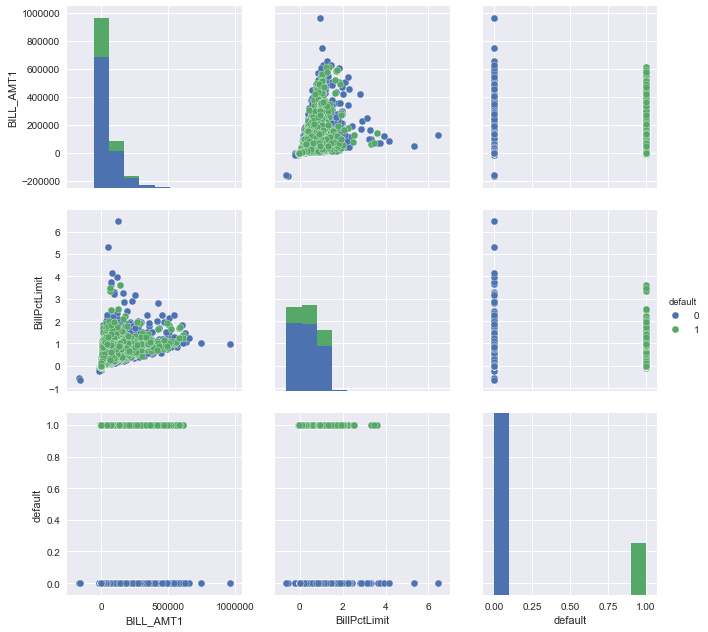

In [52]:
#Creating New Variables - Billed amount as % of Credit Limit
BillPctLimit=df['BILL_AMT1']/df['LIMIT_BAL']
#LogBillPctLimit = np.log((df['BILL_AMT1']+1)/(df['LIMIT_BAL']+1))
df = df.assign(BillPctLimit=BillPctLimit.values)
#df = df.assign(LogBillPctLimit=LogBillPctLimit.values)

VizBillPctLimit = ['BILL_AMT1','BillPctLimit','default']
%matplotlib inline
#sns.set(rc={"font.size":35,"axes.titlesize":35,"axes.labelsize":35})
sns.set()
sns.pairplot(df[VizBillPctLimit],hue = 'default',size = 3)


#print(df['BillPctLimit'])
#print(df['BILL_AMT1']/df['LIMIT_BAL'])

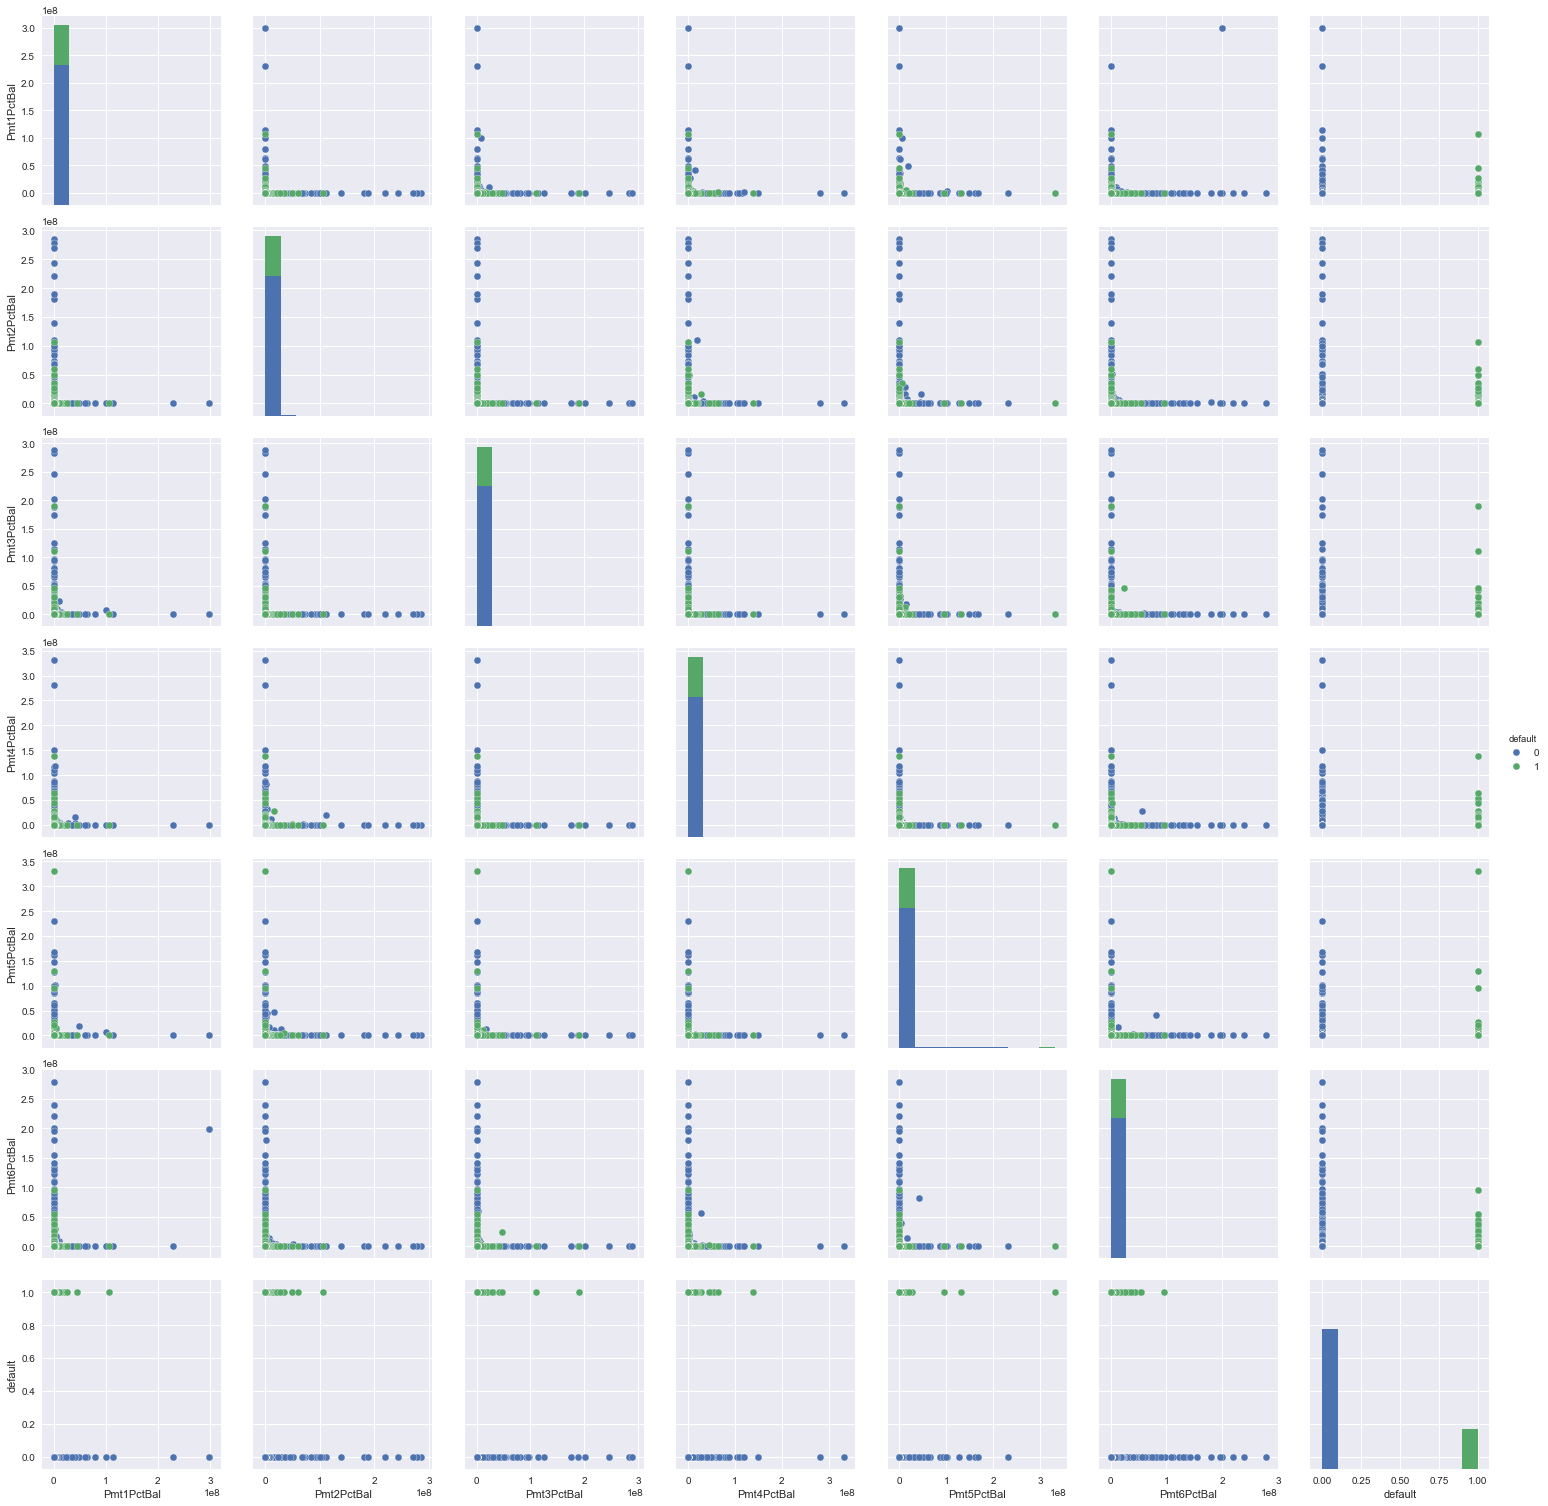

In [57]:
Pmt1PctBal = df['PAY_AMT1']/(df['BILL_AMT1']+.001)
Pmt2PctBal = df['PAY_AMT2']/(df['BILL_AMT2']+.001)
Pmt3PctBal = df['PAY_AMT3']/(df['BILL_AMT3']+.001)
Pmt4PctBal = df['PAY_AMT4']/(df['BILL_AMT4']+.001)
Pmt5PctBal = df['PAY_AMT5']/(df['BILL_AMT5']+.001)
Pmt6PctBal = df['PAY_AMT6']/(df['BILL_AMT6']+.001)

df = df.assign(Pmt1PctBal=Pmt1PctBal.values)
df = df.assign(Pmt2PctBal=Pmt2PctBal.values)
df = df.assign(Pmt3PctBal=Pmt3PctBal.values)
df = df.assign(Pmt4PctBal=Pmt4PctBal.values)
df = df.assign(Pmt5PctBal=Pmt5PctBal.values)
df = df.assign(Pmt6PctBal=Pmt6PctBal.values)

PmtPctBal = ['Pmt1PctBal','Pmt2PctBal','Pmt3PctBal','Pmt4PctBal','Pmt5PctBal','Pmt6PctBal','default']

%matplotlib inline
sns.set()
sns.pairplot(df[PmtPctBal],hue = 'default',size = 3)


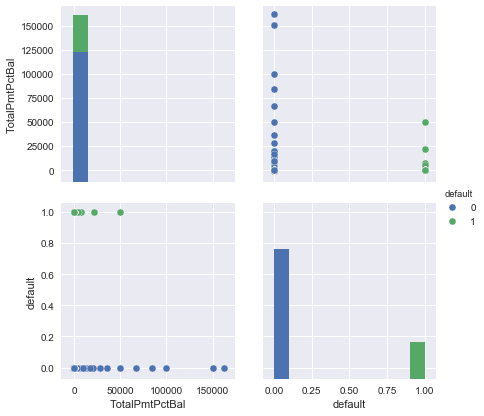

In [111]:
TotalPmtPctBal = (df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6'])/(df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT4']+df['BILL_AMT6']+1)

df = df.assign(TotalPmtPctBal=TotalPmtPctBal.values)
                                     
%matplotlib inline
sns.set()
sns.pairplot(df[['TotalPmtPctBal','default']],hue = 'default',size = 3)                                                    
                                                    

In [112]:
pd.pivot_table(df,index = ['default'],values = ["TotalPmtPctBal"], aggfunc=[len, np.mean,np.min, pcntile25, np.median, pcntile75,np.max])

len           mean           amin      pcntile25  \
        TotalPmtPctBal TotalPmtPctBal TotalPmtPctBal TotalPmtPctBal   
default                                                               
0              23364.0      40.248316   -1256.000000       0.042077   
1               6636.0      16.764705     -72.391304       0.036609   

                median      pcntile75           amax  
        TotalPmtPctBal TotalPmtPctBal TotalPmtPctBal  
default                                               
0             0.106988       0.646680       162000.0  
1             0.055447       0.244002        49525.0

In [92]:
sns.set()
#sns.factorplot('TotalPmtPctBal','default',df,kind="box", size = 10)

#sns.boxplot(x=df["TotalPmtPctBal"])

sns.distplot(int(float((df["TotalPmtPctBal"]*100)//1)))

TypeError: cannot convert the series to <class 'float'>

In [113]:
garb = df['TotalPmtPctBal']*100//1

df = df.assign(garb=garb.values)
garbint = df['garb'].astype(np.int64)
df = df.assign(garbint=garbint.values)
#df['garbint1']= np.where(df[garbint]>1000,1000,df[garbint]).tolist()
#df['garbint']= df[garbint].apply(lambda x: [y if y < 300 else 300 for y in x])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 39 columns):
ID                 30000 non-null int64
LIMIT_BAL          30000 non-null int64
SEX                30000 non-null int64
EDUCATION          30000 non-null int64
MARRIAGE           30000 non-null int64
AGE                30000 non-null int64
PAY_0              30000 non-null int64
PAY_2              30000 non-null int64
PAY_3              30000 non-null int64
PAY_4              30000 non-null int64
PAY_5              30000 non-null int64
PAY_6              30000 non-null int64
BILL_AMT1          30000 non-null int64
BILL_AMT2          30000 non-null int64
BILL_AMT3          30000 non-null int64
BILL_AMT4          30000 non-null int64
BILL_AMT5          30000 non-null int64
BILL_AMT6          30000 non-null int64
PAY_AMT1           30000 non-null int64
PAY_AMT2           30000 non-null int64
PAY_AMT3           30000 non-null int64
PAY_AMT4           30000 non-null int64
PAY_AMT5   